# Text-to-Image Generation using Stable Diffusion and Diffusers.

In [ ]:
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.0 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [ ]:
!pip show torch

Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision


In [ ]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = "A image of a man falling in a blackhole."
image = pipe(prompt).images[0]

NameError: name 'pipe' is not defined

[PROMPT]:  A image of a man falling in a blackhole.


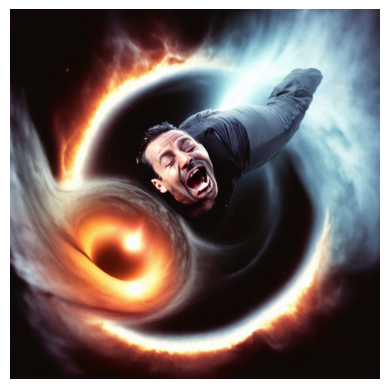

In [ ]:
import matplotlib.pyplot as plt
print("[PROMPT]: ", prompt)
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
!pip install flask flask-ngrok

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2hVj9MfqOWFKd0II7q9m2E9XQQX_2o8jTu4HhuBoTWg8Y9CXe")

In [ ]:
# !python app.py

In [ ]:
!pip install flask pyngrok diffusers transformers

from pyngrok import ngrok
from flask import Flask, request, render_template_string
import torch
from diffusers import StableDiffusionPipeline
import base64
from io import BytesIO

# Set up Ngrok authentication
ngrok.set_auth_token("2hVj9MfqOWFKd0II7q9m2E9XQQX_2o8jTu4HhuBoTWg8Y9CXe")

app = Flask(__name__)

# Load the Stable Diffusion model
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
try:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")
except Exception as e:
    print("Error loading the model:", e)
    exit(1)

# HTML template for the form
html_template = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Panda Image Generator</title>
    <link rel="icon" type="image/x-icon"
        href="https://github.com/Anurag-cod4fun/Social_Model_Training/blob/master/panda.png?raw=true">
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.3/css/bulma.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        .navbar-brand img {
            max-height: 70px;
        }

        .navbar-brand .brand-text {
            font-size: 1.5em;
            margin-left: 10px;
        }

        .image-container {
            margin-top: 30px;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            text-align: center;
        }

        .loading-bar {
            width: 100%;
            background-color: #f0f0f0;
            border-radius: 4px;
            margin-bottom: 10px;
            overflow: hidden;
        }

        .completion-bar {
            height: 4px;
            background-color: #4caf50;
            width: 0;
            transition: width 0.3s ease;
        }

        .loading-text {
            margin-bottom: 10px;
        }

        #info {
          padding-bottom: 100px;
        }


        .footer {
            background-color: #f5f5f5;
            padding: 20px 0;
            text-align: center;
            position: fixed;
            bottom: 0;
            width: 100%;
        }

        .toggle-theme {
            cursor: pointer;
            font-size: 24px;
        }

        .dark-mode {
            background-color: #121212;
            color: #ffffff;
        }

        .dark-mode .navbar.is-primary {
            background-color: #212121;
        }

        .dark-mode .navbar.is-primary .navbar-item {
            color: #ffffff;
        }

        .dark-mode .navbar.is-primary .navbar-burger span {
            background-color: #ffffff;
        }

        .dark-mode .image-container {
            background-color: #212121;
        }

        .dark-mode .image-container h2 {
            color: #ffffff;
        }

        .dark-mode .title {
            color: #ffffff;
        }

        .dark-mode .label {
            color: #ffffff;
        }
        .dark-mode h2.title {
    color: #ffffff;
}

.dark-mode .content p,
.dark-mode .content h3,
.dark-mode .content ul,
.dark-mode .content li {
    color: #ffffff;
}

.dark-mode .content strong {
    color: #ffffff;
}

        .dark-mode .footer {
            background-color: #333333;
            color: #ffffff;
        }
    </style>
</head>

<body>
    <nav class="navbar is-primary" role="navigation" aria-label="main navigation">
        <div class="container">
            <div class="navbar-brand">
                <a class="navbar-item" href="#">
                    <img src="https://github.com/Anurag-cod4fun/Social_Model_Training/blob/master/panda.png?raw=true"
                        alt="Logo">
                    <span class="brand-text">PANDA - SD</span>
                </a>
                <a role="button" class="navbar-burger burger" aria-label="menu" aria-expanded="false"
                    data-target="navbarBasicExample">
                    <span aria-hidden="true"></span>
                    <span aria-hidden="true"></span>
                    <span aria-hidden="true"></span>
                </a>
            </div>

            <div id="navbarBasicExample" class="navbar-menu">
                <div class="navbar-start">
                    <a class="navbar-item" href="#home">
                        Home
                    </a>
                    <a class="navbar-item" href="#info">
                        Info
                    </a>
                    <a class="navbar-item" href="https://github.com/Anurag-cod4fun" target="_blank">
                        My GitHub
                    </a>
                </div>

                <div class="navbar-end">
                    <div class="navbar-item">
                        <div class="toggle-theme">
                            <i class="fas fa-moon" id="theme-icon"></i>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </nav>

    <section id="home" class="section">
        <div class="container">
            <h1 class="title">Panda Image Generator</h1>
            <form method="POST" enctype="multipart/form-data">
                <div class="field">
                    <label class="label" for="prompt">Enter a prompt:</label>
                    <div class="control">
                        <input class="input" type="text" id="prompt" name="prompt" required>
                    </div>
                </div>
                <div class="field">
                    <div class="control">
                        <button class="button is-primary" type="submit">Generate Image</button>
                    </div>
                </div>
            </form>
            <div class="image-container" id="generated-image-container">
                <div class="loading-bar">
                    <div class="completion-bar" id="completion-bar"></div>
                </div>
                {% if image %}
                <h2 class="subtitle">Generated Image:</h2>
                <img id="generated-image" src="data:image/png;base64,{{ image }}" alt="Generated Image">
                <div class="actions" style="margin-top: 20px;">
                    <button class="button is-info" onclick="viewFullScreen()">View Full Screen</button>
                    <button class="button is-success" onclick="downloadImage()">Download Image</button>
                </div>
                {% endif %}
            </div>
        </div>
    </section>

    <section id="info" class="section">
        <div class="container">
            <h2 class="title">About Panda - SD Image Generator</h2>
            <div class="content">
                <p>
                    Panda - SD is an innovative deep learning model designed for text-to-image generation tasks. Developed by CompVis, Panda - SD leverages advanced machine learning techniques to create high-quality images from textual prompts.
                </p>
                <h3>How Panda - SD Works</h3>
                <p>
                    Panda - SD operates on the principle of stable diffusion, a process that involves iteratively refining an initial image based on the provided text prompt. This refinement process continues until a realistic and detailed image is generated.
                </p>
                <h3>Key Features</h3>
                <ul>
                    <li><strong>Text-to-Image Generation:</strong> Panda - SD can interpret natural language prompts and generate corresponding images with remarkable detail and fidelity.</li>
                    <li><strong>Adaptive Learning:</strong> The model continually learns from user interactions, allowing it to improve its image generation capabilities over time.</li>
                    <li><strong>Scalability:</strong> Panda - SD is designed to scale efficiently, enabling rapid image generation even on consumer-grade hardware.</li>
                </ul>
                <h3>Applications</h3>
                <ul>
                    <li><strong>Creative Content Creation:</strong> Content creators can use Panda - SD to generate illustrations, artwork, and visualizations based on textual descriptions.</li>
                    <li><strong>Educational Resources:</strong> Teachers and educators can utilize Panda - SD to create visually engaging educational materials, including diagrams, charts, and illustrations.</li>
                    <li><strong>Product Design:</strong> Designers and engineers can employ Panda - SD to quickly visualize product concepts and prototypes from textual specifications.</li>
                </ul>
                <h3>Ethical Considerations</h3>
                <p>
                    While Panda - SD offers exciting possibilities, it's essential to consider the ethical implications of AI-generated content. Users should be mindful of potential biases in the generated images and ensure responsible use of the technology.
                </p>
                <h3>Get Started</h3>
                <p>
                    Experience the power of Panda - SD by entering a text prompt and generating your custom images today!
                </p>
            </div>
        </div>
    </section>


    <footer class="footer">
        <div class="content">
            <p>© 2024 PANDA - SD. All rights reserved.</p>
        </div>
    </footer>

    <script>
        function viewFullScreen() {
            var image = document.getElementById("generated-image");
            if (image.requestFullscreen) {
                image.requestFullscreen();
            } else if (image.mozRequestFullScreen) { /* Firefox */
                image.mozRequestFullScreen();
            } else if (image.webkitRequestFullscreen) { /* Chrome, Safari & Opera */
                image.webkitRequestFullscreen();
            } else if (image.msRequestFullscreen) { /* IE/Edge */
                image.msRequestFullscreen();
            }
        }

        function downloadImage() {
            var image = document.getElementById("generated-image").src;
            var link = document.createElement('a');
            link.href = image;
            link.download = 'generated_image.png';
            document.body.appendChild(link);
            link.click();
            document.body.removeChild(link);
        }

        function hideLoader() {
          var loader = document.getElementById("loading-text");
          var completionBar = document.getElementById("completion-bar");
          loader.style.display = "none";
          completionBar.style.width = "100%";
        }

        // Theme toggle logic
        const themeIcon = document.getElementById("theme-icon");
        themeIcon.addEventListener("click", function () {
            document.body.classList.toggle("dark-mode");
            if (document.body.classList.contains("dark-mode")) {
                themeIcon.classList.remove("fa-moon");
                themeIcon.classList.add("fa-sun");
            } else {
                themeIcon.classList.remove("fa-sun");
                themeIcon.classList.add("fa-moon");
            }
        });
    </script>
</body>

</html>

"""

@app.route("/", methods=["GET", "POST"])
def home():
    image_base64 = None
    if request.method == "POST":
        prompt = request.form.get("prompt")

        if prompt:
            try:
                # Generate image using Stable Diffusion
                with torch.no_grad():
                    image = pipe(prompt).images[0]

                # Convert the generated image to base64 to display it in HTML
                buffered = BytesIO()
                image.save(buffered, format="PNG")
                image_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")
            except Exception as e:
                print("Error generating image:", e)

    return render_template_string(html_template, image=image_base64)

if __name__ == "__main__":
    from threading import Thread

    def run_app():
        app.run()

    thread = Thread(target=run_app)
    thread.start()

    # Create a tunnel to the Flask app
    public_url = ngrok.connect(5000).public_url
    print(f" * ngrok tunnel: {public_url}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * ngrok tunnel: https://e98d-34-143-142-56.ngrok-free.app
